# Példa 7.8


Hányszor nagyobb erő ébred az alábbi tartó $B$ alátámasztásánál, mint az $A$ vagy 
$C$ helyen? Rajzoljuk fel a tartó igénybevételi függvényeit paraméteresen! A tartó anyaga és keresztmetszete végig állandó.

<img src="Fig_7.8.png" style="width: 400px;">

# Megoldás

Betöltjük a `sympy` modult. Definiáljuk a szimbólumokat.

In [1]:
import sympy as sp
sp.init_printing()

L, p, x, F_A, F_B, F_C = sp.symbols('L, p, x, F_A, F_B, F_C')

## $\frac{F_B}{F_A}$ hányados

A feladat statikailag határozatlan. Tegyük határozottá a $B$ alátámasztás eltávolításával és vegyük fel a koordinátarendszert. Ebben az esetben az alakváltozási feltétel:
$$\frac{\partial U}{\partial F_B}=0.$$
<img src="Fig_7.8b.png" style="width: 400px;">

Ekkor $U=U_{Mh}$. A fenti parciális derivált a következő módon írható fel:
$$\frac{\partial U}{\partial F_B}=\frac{1}{IE}\left(\int_0^L M_{h1} \frac{\partial M_{h1}}{\partial F_B}\mathrm{d}x + \int_L^{2L} M_{h2} \frac{\partial M_{h2}}{\partial F_B}\mathrm{d}x\right)=0.$$

Írjuk fel a reakcióerőket $F_B$ függvényeként. Ehhez először írjuk fel a nyomatéki egyenletet az $A$ pontra, majd fejezzük ki belőle $F_C$-t. Az egyenletet 0-ra rendezve írjuk fel.

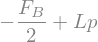

In [2]:
MA_egy = -p*2*L*L+F_B*L+F_C*2*L
FC_kif = sp.solve(MA_egy,F_C) #kifejezzük F_C-t, a megoldást egy 1 elemű listában kapjuk
FC_kif = FC_kif[0] #kiszedjük a listából a megoldást
FC_kif

Írjuk fel a függőleges irányú erőegyensúlyt. Fejezzük ki $F_A$-t, behelyettesítve $F_C$-re a fent kifejezést.

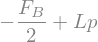

In [3]:
Fy_egy = F_A+F_B+F_C-p*2*L
Fy_egy = Fy_egy.subs(F_C,FC_kif) #behelyettsítjük az F_C-re fentebb kiszámolt kifejezést
FA_kif = sp.solve(Fy_egy,F_A) #kifejezzük F_A-t
FA_kif = FA_kif[0]
FA_kif

Azonos eredményt kaptunk, mint $F_C$-re. Ez nem meglepő, hiszen a rendszer szimmetrikus.

Írjuk fel a hajlítónyomatéki függvényeket, szintén $F_B$-vel kifejezve!

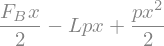

In [4]:
Mh1 = -F_A*x+p*x**2/2 #a hajlítónyomatéki függvény F_A-val kifejezve
Mh1 = Mh1.subs(F_A,FA_kif)
display(Mh1.expand()) #.expand(): zárójelek kibontása az olvashatóbb eredményért
#parciális derivált:
parcMh1 = Mh1.diff(F_B)
parcMh1

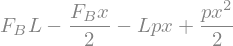

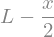

In [5]:
Mh2 = Mh1-F_B*(x-L)
display(Mh2.expand()) #.expand(): zárójelek kibontása az olvashatóbb eredményért
#parciális derivált:
parcMh2 = Mh2.diff(F_B)
parcMh2

Írjuk be a feladat elején szereplő integrálba a kiszámolt eredményeket. A `sympy`-ban integrálni az `integrate(kifejezes, valtozo)` utasítással tudunk. Határozott integrál számításához meg kell adnunk a határokat is a következő szintaktikával: `integrate(kifejezes, (valtozo, also_hatar, felso_hatar))`.

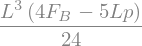

In [6]:
integr = sp.integrate(Mh1*parcMh1,(x,0,L)) + sp.integrate(Mh2*parcMh2,(x,L,2*L))
integr = integr.simplify() #.simplify(): egyszerűsítések elvégzése
integr

A fenti egyenletet kell megoldanuk $F_B$-re.

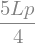

In [7]:
FB_sol = sp.solve(integr,F_B)
FB_sol = FB_sol[0]
FB_sol

Ezt írjuk vissza $F_A=F_C$-be.

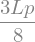

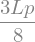

In [8]:
FA_sol = FA_kif.subs(F_B,FB_sol)
display(FA_sol)
FC_sol = FC_kif.subs(F_B,FB_sol)
FC_sol

Kiszámítva az $\frac{F_B}{F_A}$ hányados:

In [9]:
FB_sol/FA_sol

## Igénybevételi függvények

A korábbi ábrázolásokhoz hasonlóan szakaszosan folytonos függvényt az `sp.Piecewise` segítségével definiálhatunk. A szabadtest ábra, immár a kiszámolt értékekkel:
<img src="Fig_7.8c.png" style="width: 600px;">

Nyíró igénybevétel: $V(x)$.

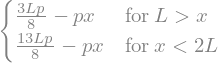

In [10]:
Vx = sp.Piecewise((FA_sol-x*p, x<L),(FA_sol-x*p+FB_sol, x<2*L))
Vx

Hajlító igénybevétel: $M_h(x)$. Felhasználjuk a korábbi eredményeket.

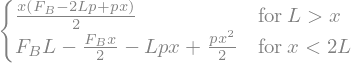

In [11]:
Mhx = sp.Piecewise((Mh1.simplify(),x<L),(Mh2.simplify(),x<2*L))
Mhx

### Ábrázolás

Betöltjük a `matplotlib`-et és a `linspace`-t.

In [12]:
import matplotlib.pyplot as plt
from numpy import linspace

Láthatjuk, hogy az $x$ koordinátán kívül az $L$ és $p$ is benne marad az igénybevételi függvények kifejezéseiben. Mivel plotolni csak konkrét számokkal tudunk, ezért ezeknek szükséges valamilyen önkényes (de fizikailag értelmes) értéket adnunk. Ez nem befolyásolja az ábrák jelleghelyességét. Itt most $L=1 \, \rm{m}$-t és $p=1\,\rm{\frac{N}{m}}$-t választunk.

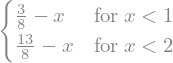

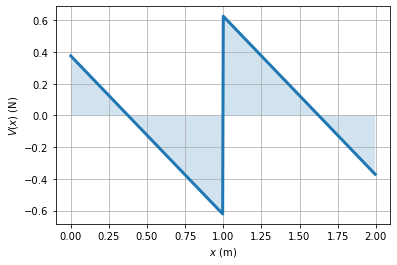

In [13]:
L_val = 1
p_val = 1
xs = linspace(0,2*L_val,501) #felveszünk 501 pontot a 2L távolságon
Vx_konkret = Vx.subs([(L,L_val),(p,p_val)])
display(Vx_konkret)

Vxs = [float(Vx_konkret.subs(x,xi)) for xi in xs] #kiszámoljuk V(x) értékeit az adott x értékeken, 
                                                  #és egyből 'float'-tá alakítjuk őket
plt.plot(xs, Vxs, lw = 3) # A V(x) függvény képének létrehozása 3-as vonalvastagsággal (linewidth = lw).
plt.fill_between(xs, Vxs, alpha=0.2) #Kiszínezi a függvény alatti területet
plt.xlabel("$x$ (m)") #x tengelyhez tartozó tengelyfelirat
plt.ylabel("$V(x)$ (N)") #y tengelyhez tartozó tengelyfelirat
plt.grid() #rács
plt.show() #kirajzolás

A hajlítónyomatéki függvényben $F_B$ is szerepel. $F_B$-t már kifejeztük $L$ és $p$ függvényeként, viszont a behelyettesítéseknél figyelnünk kell arra, hogy először $F_B$ helyére írjuk be az $L$-t és $p$-t tartalmazó kifejezést, és csak utána ezek konkrét értékeit. Ellenkező esetben $L$-t és $p$-t tartalmazó eredményt kapunk, és újra be kell helyettesítenünk a konkrét értékeket.

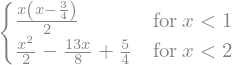

In [14]:
Mhx_konkret = Mhx.subs([(F_B,FB_sol),(L,L_val),(p,p_val)])
display(Mhx_konkret)

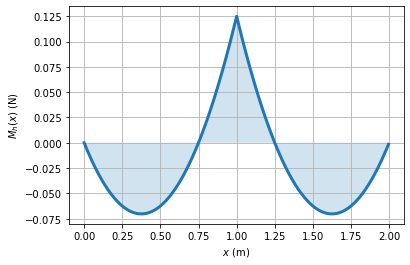

In [15]:
Mhxs = [float(Mhx_konkret.subs(x,xi)) for xi in xs] #kiszámoljuk V(x) értékeit az adott x értékeken, 
                                                    #és egyből 'float'-tá alakítjuk őket
plt.plot(xs, Mhxs, lw = 3) # A V(x) függvény képének létrehozása 3-as vonalvastagsággal (linewidth = lw).
plt.fill_between(xs, Mhxs, alpha=0.2) #Kiszínezi a függvény alatti területet
plt.xlabel("$x$ (m)") #x tengelyhez tartozó tengelyfelirat
plt.ylabel("$M_h(x)$ (N)") #y tengelyhez tartozó tengelyfelirat
plt.grid() #rács
plt.show() #kirajzolás